# Analyse pH et espèce

### Importer les librairy

In [5]:
library(tidyverse)   
library(readr)       
library(readxl)     
library(vegan)       
library(reshape2)  
library(dplyr)
library(randomForest)

### Open les datas

In [6]:
spe <- read_delim("MQU_spe.txt", delim = "\t")
env <- read_delim("MQU_env.txt", delim = "\t")
traits <- read_delim("MQU_traits.txt", delim = "\t")
loc <- read_delim("MQU_loc.txt", delim = "\t")

spe <- spe %>% 
  rename(site = `...1`)

env <- env %>%
  rename(site = `Locality code`)

loc <- loc %>%
  rename(site = `Locality code`)

New names:
• `` -> `...1`
Rows: 9 Columns: 90
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (1): ...1
dbl (89): Acer palmatum var. pubescens, Acer serrulatum, Ardisia quinquegona...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 9 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): Locality code
dbl (2): Elevation, pH

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 89 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): Species
dbl (5): SLA, LDMC, LT, LA, SSD

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types =

### Merge les espèces et les données environmentales

In [7]:
df_merged_trait <- spe %>% left_join(env, by="site")
View(df_merged_trait)

site,Acer palmatum var. pubescens,Acer serrulatum,Ardisia quinquegona,Barthea barthei,Blastus cochinchinensis,Camellia brevistyla,Camellia tenuifolia,Castanopsis cuspidata var. carlesii,Chamaecyparis obtusa var. formosana,⋯,Ternstroemia gymnanthera,Tricalysia dubia,Trochodendron aralioides,Turpinia formosana,Vaccinium randaiense,Viburnum foetidum var. rectangulatum,Viburnum integrifolium,Viburnum taitoense,Elevation,pH
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
M01,0.00,0.00,4.94,0.00,9.49,0.00,0.00,4.16,0.00,⋯,0.00,0.42,0.00,0.00,0.0,0.00,0.00,0.00,794,3.8
M02,0.00,4.45,0.48,0.00,0.49,0.00,0.00,0.00,0.00,⋯,0.00,2.48,0.00,3.03,0.0,0.00,0.00,0.00,947,4.1
M03,0.00,0.00,0.18,0.00,21.31,0.00,0.00,0.92,0.00,⋯,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,868,3.0
Q01,0.00,0.00,0.00,0.16,0.00,0.00,0.00,0.00,0.17,⋯,0.00,0.00,0.00,0.00,3.1,0.00,0.00,0.00,1343,3.5
Q02,0.00,0.00,0.00,0.00,0.00,0.41,0.00,0.00,0.00,⋯,1.53,0.00,0.00,0.00,0.2,0.00,0.00,5.36,1606,3.0
Q03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,⋯,0.32,0.00,0.32,0.00,0.0,1.93,0.32,0.63,1571,3.4
U01,3.31,0.00,0.00,0.00,0.00,0.00,3.25,12.43,0.00,⋯,1.59,0.00,4.01,0.00,0.0,1.30,0.00,0.00,1890,2.9
U02,0.00,0.00,0.00,0.00,0.00,0.00,2.32,0.00,2.21,⋯,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,2082,2.8
U03,0.00,0.00,0.00,6.83,0.00,0.00,0.00,0.00,45.63,⋯,0.36,0.00,2.28,0.00,0.0,1.18,0.00,0.00,1921,3.2


# Hierarchical clustering

Librairy to download

In [8]:
library(vegan)
library(NbClust)

Distance matrix

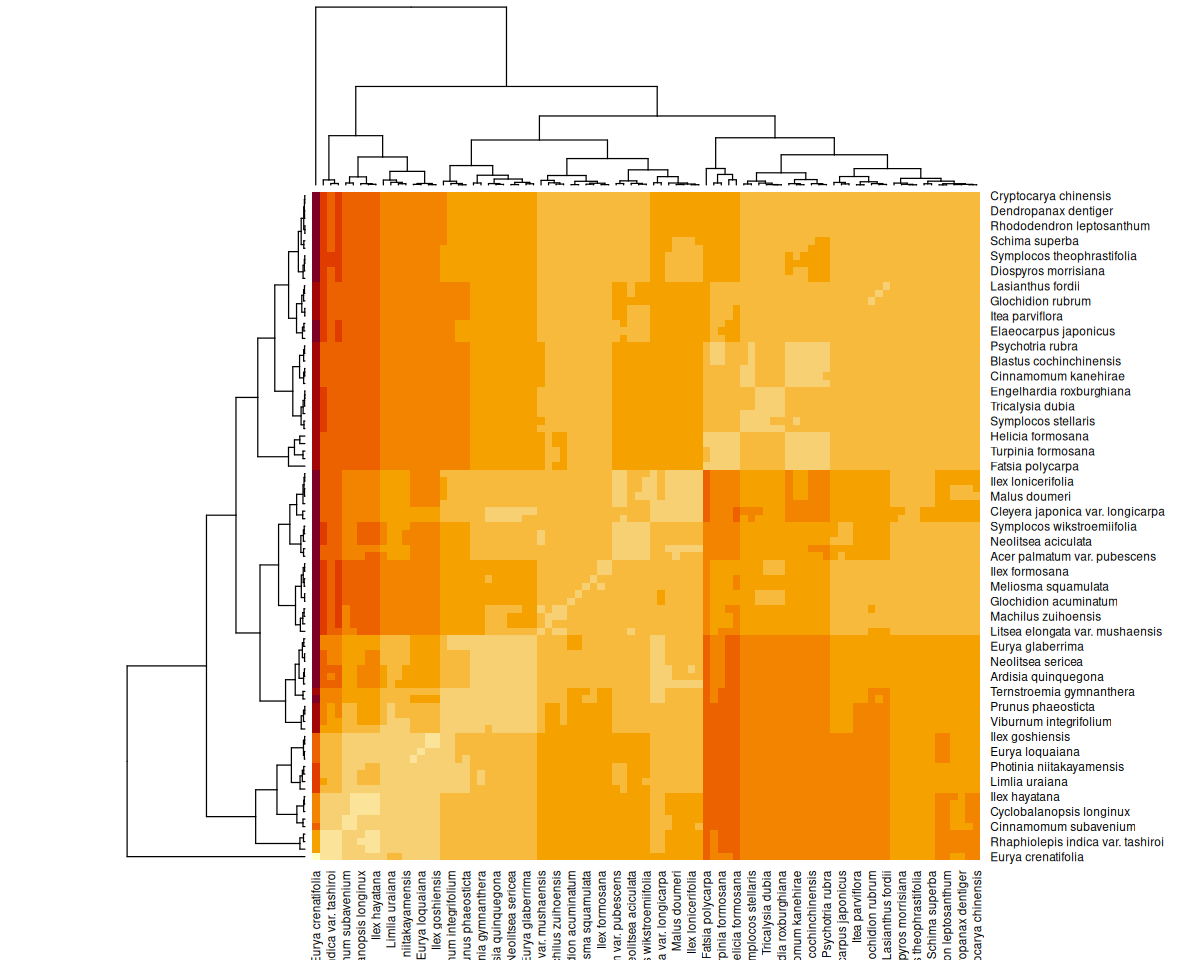

In [9]:
# Create distance matrix from normalized traits
# First, prepare the traits data (remove non-numeric columns if any)
traits_numeric <- traits %>% 
  column_to_rownames(var = colnames(traits)[1]) %>%  # Set first column as row names
  as.data.frame()

# Normalize the traits
traits_norm <- decostand(traits_numeric, "normalize")

# Calculate the distance matrix from normalized traits
distance_mat <- vegdist(traits_norm, "euc")  # Euclidean distance of normalized traits

options(repr.plot.width = 10, repr.plot.height = 8)
heatmap(as.matrix(distance_mat))

## Ward linkage

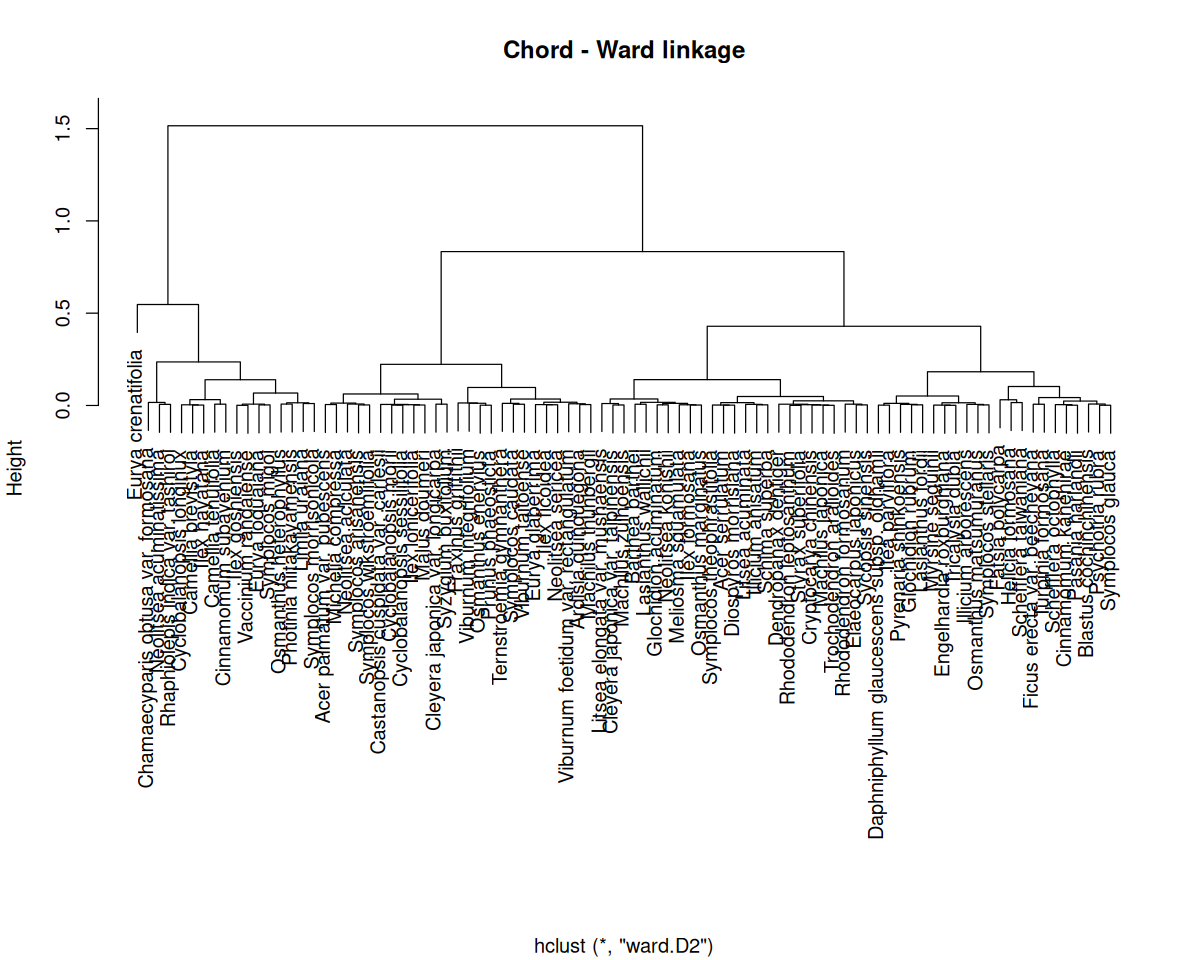

In [10]:
# Compute Ward linkage agglomerative clustering
spe.ch.ward <- hclust(distance_mat, method = "ward.D2")

# Set plot size in Jupyter Notebook (10 x 8 inches)
options(repr.plot.width = 10, repr.plot.height = 8)

# Plot the dendrogram using default options
plot(spe.ch.ward, main = "Chord - Ward linkage", xlab="")

Cophenetic distance

In [11]:
# Compute the cophenetic distance matrix from the dendrogram obtained with Ward linkage clustering
spe.ch.ward.coph <- cophenetic(spe.ch.ward)

# Compute the cophenetic correlation between the original dissimilarities and the dendrogram
cor(distance_mat, spe.ch.ward.coph)

[1] 0.7466762

Shephard diagram

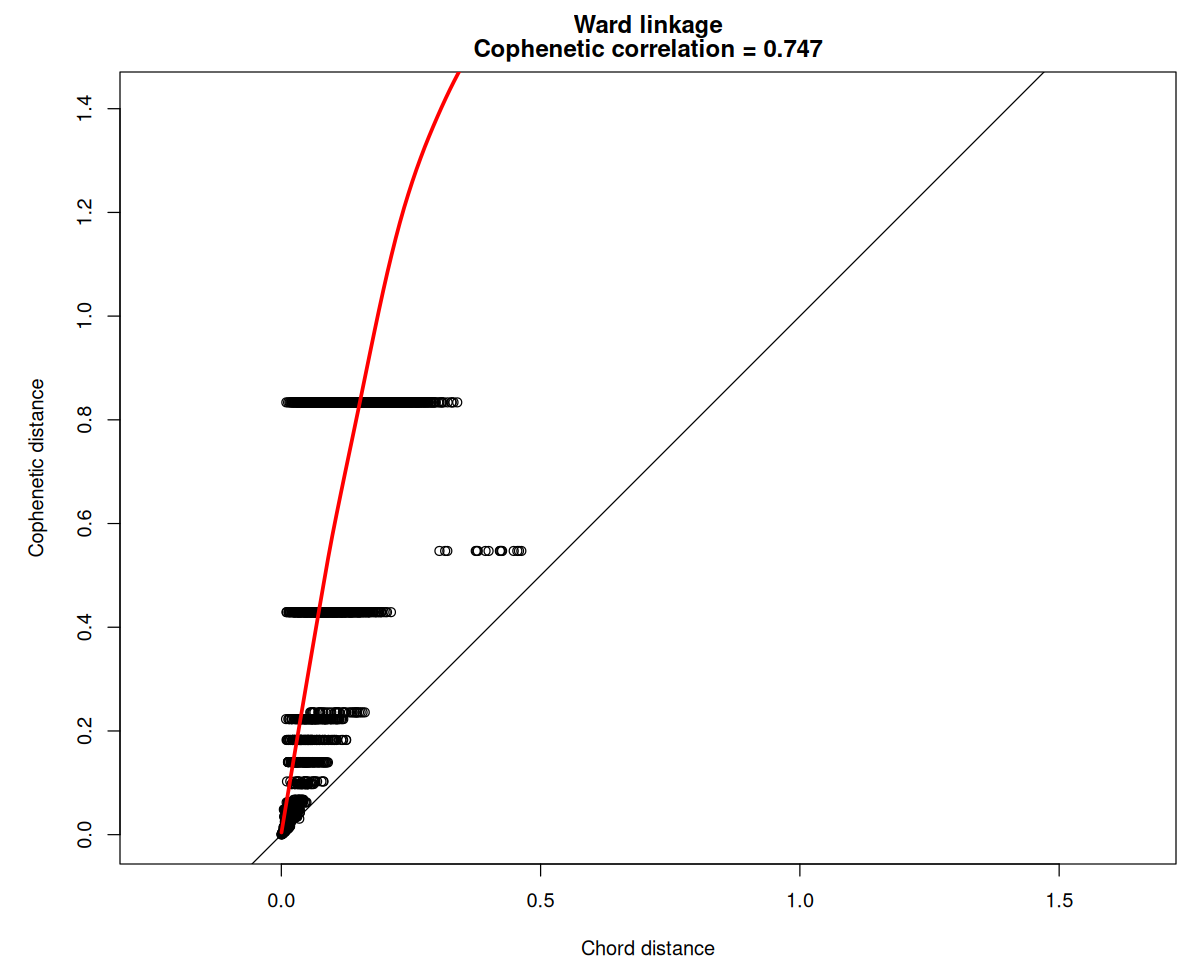

In [12]:
# Set plot size in Jupyter Notebook (10 x 8 inches)
options(repr.plot.width = 10, repr.plot.height = 8)

# Shepard diagram ---------------------------------------------------------
par(mfrow=c(1,1), mar=c(4,5,3,1))
plot(distance_mat, spe.ch.ward.coph, #initial chord distance against cophenetic distance from Ward linkage clustering
  xlab = "Chord distance",
  ylab = "Cophenetic distance",
  asp = 1, xlim = c(0, sqrt(2)),
  ylim = c(0, sqrt(2)),
  main = c("Ward linkage", paste("Cophenetic correlation =", round(cor(distance_mat, spe.ch.ward.coph), 3))))
abline(0, 1)  # Add a 1:1 reference line (ideal match between distances)
lines(lowess(distance_mat, spe.ch.ward.coph), col = "red", lwd=3) # Add a LOWESS (locally weighted scatterplot smoothing) curve to visualize the trend

Optimal number of cluster

In [13]:
Nb.ward <- NbClust(
  traits_numeric,                # Input Spe matrix 
  diss = distance_mat,      #  Chord distance matrix for spe
  distance = NULL,    # Distance metric is NULL because we provide 'diss' directly
  min.nc = 2,         # Minimum number of clusters to test (start at 2)
  max.nc = 16,        # Maximum number of clusters to test (up to 16)
  method = "ward.D2",  # Clustering linkage method: Ward linkage here
  index = "ch"        # Evaluation criterion: Calinski-Harabasz index
)

Nb.ward  # Displays the output from NbClust, including the suggested "optimal" number of clusters (best.nc) (here 10 clusters are suggested). 

$All.index
     2      3      4      5      6      7      8      9     10     11     12 
2.5577 3.4969 2.3073 3.6817 2.9109 2.4023 3.7964 3.2921 2.8899 9.8358 8.8274 
    13     14     15     16 
7.9876 7.2773 6.6842 6.1597 

$Best.nc
Number_clusters     Value_Index 
        11.0000          9.8358 

$Best.partition
             Acer palmatum var. pubescens 
                                        1 
                          Acer serrulatum 
                                        2 
                      Ardisia quinquegona 
                                        3 
                          Barthea barthei 
                                        4 
                  Blastus cochinchinensis 
                                        5 
                      Camellia brevistyla 
                                        6 
                      Camellia tenuifolia 
                                        6 
      Castanopsis cuspidata var. carlesii 
                                        1 
      Chamaecyparis obtusa var. formosana 
                                        7 
                     Cinnamomum kanehirae 
                                        5 
                    Cinnamomum subavenium 
                                        6 
         Cleyera japonica var. longicarpa 
                                        1 
        Cleyera japonica var. taipinensis 
                                        4 
                    Cryptocarya chinensis 
                                        2 
                 Cyclobalanopsis longinux 
                                        6 
                    Cyclobalanopsis morii 
                                        1 
             Cyclobalanopsis sessilifolia 
                                        1 
Daphniphyllum glaucescens subsp. oldhamii 
                                        8 
                     Dendropanax dentiger 
                                        2 
                     Diospyros morrisiana 
                                        2 
                    Elaeocarpus japonicus 
                                        2 
                 Engelhardia roxburghiana 
                                        8 
                       Eurya crenatifolia 
                                        9 
                         Eurya glaberrima 
                                        3 
                          Eurya loquaiana 
                                       10 
                         Fatsia polycarpa 
                                       11 
             Ficus erecta var. beecheyana 
                                        5 
                      Fraxinus griffithii 
                                        3 
                    Glochidion acuminatum 
                                        4 
                        Glochidion rubrum 
                                        8 
                        Helicia formosana 
                                       11 
                            Ilex ficoidea 
                                        3 
                           Ilex formosana 
                                        4 
                          Ilex goshiensis 
                                       10 
                            Ilex hayatana 
                                        6 
                       Ilex lonicerifolia 
                                        1 
                        Illicium anisatum 
                                        2 
                     Illicium arborescens 
                                        8 
                          Itea parviflora 
                                        8 
                        Lasianthus fordii 
                                        8 
                     Lasianthus wallichii 
                                        4 
                           Limlia uraiana 
                                       10 
                         Litsea acuminata 
                           

Plot of optimal number of cluster

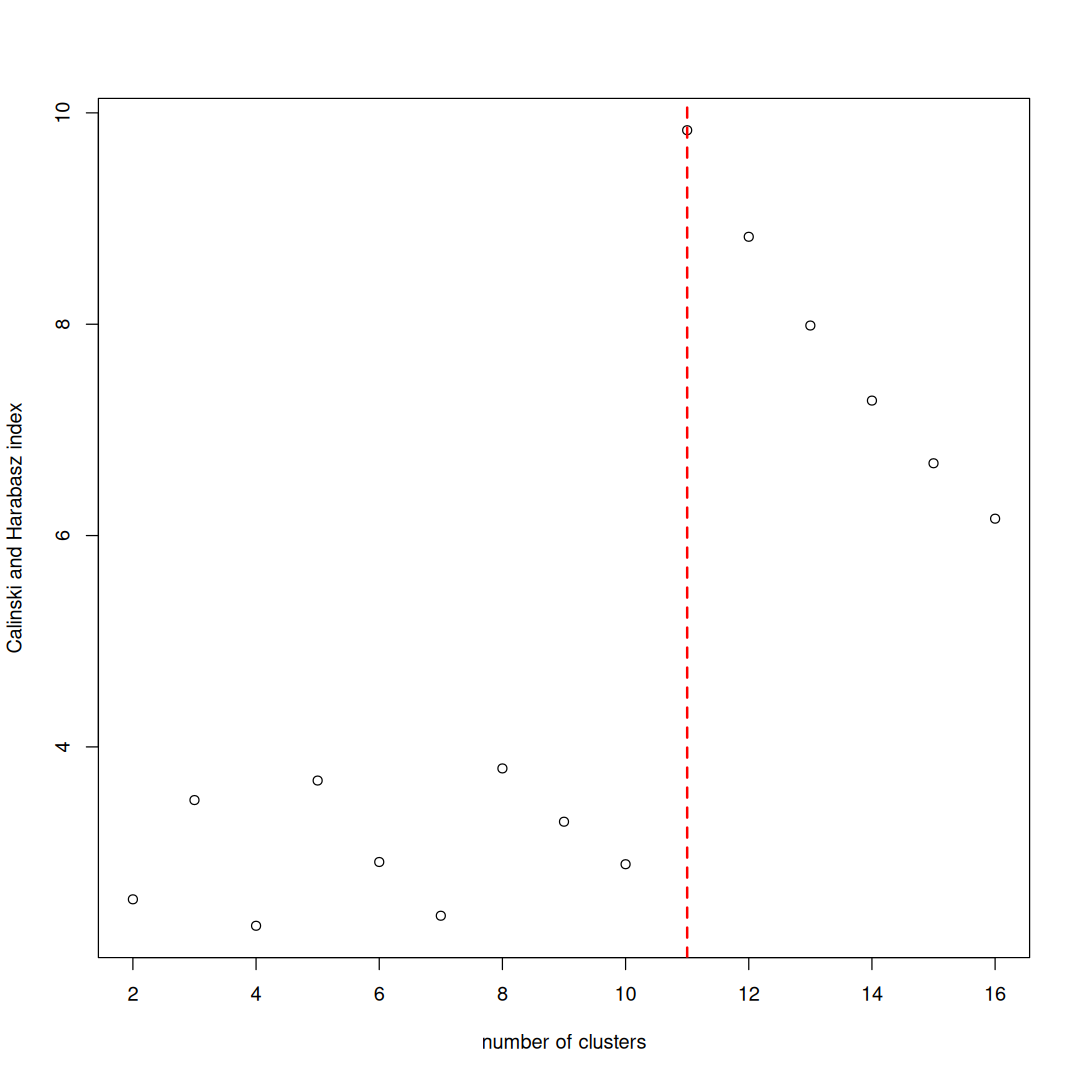

In [14]:
# Set plot size in Jupyter Notebook (9 x 9 inches)
options(repr.plot.width = 9, repr.plot.height = 9)
# Plot Index values (y) vs. number of clusters (x from 2 to 16)

plot(2:16,                                    # x : Range of cluster numbers to test (min to max)
     Nb.ward$All.index,                      # Index values (y) for each number of clusters
     xlab = "number of clusters",             # Label for x-axis
     ylab = "Calinski and Harabasz index")    # Label for y-axis

abline(v = Nb.ward$Best.nc[1],               # Add a vertical dashed line at optimal number of clusters
       col = "red",                           # Color of the line
       lty = 2,                               # Line type 2 = dashed
       lwd = 2)                               # Line width thicker for visibility


## Median linkage

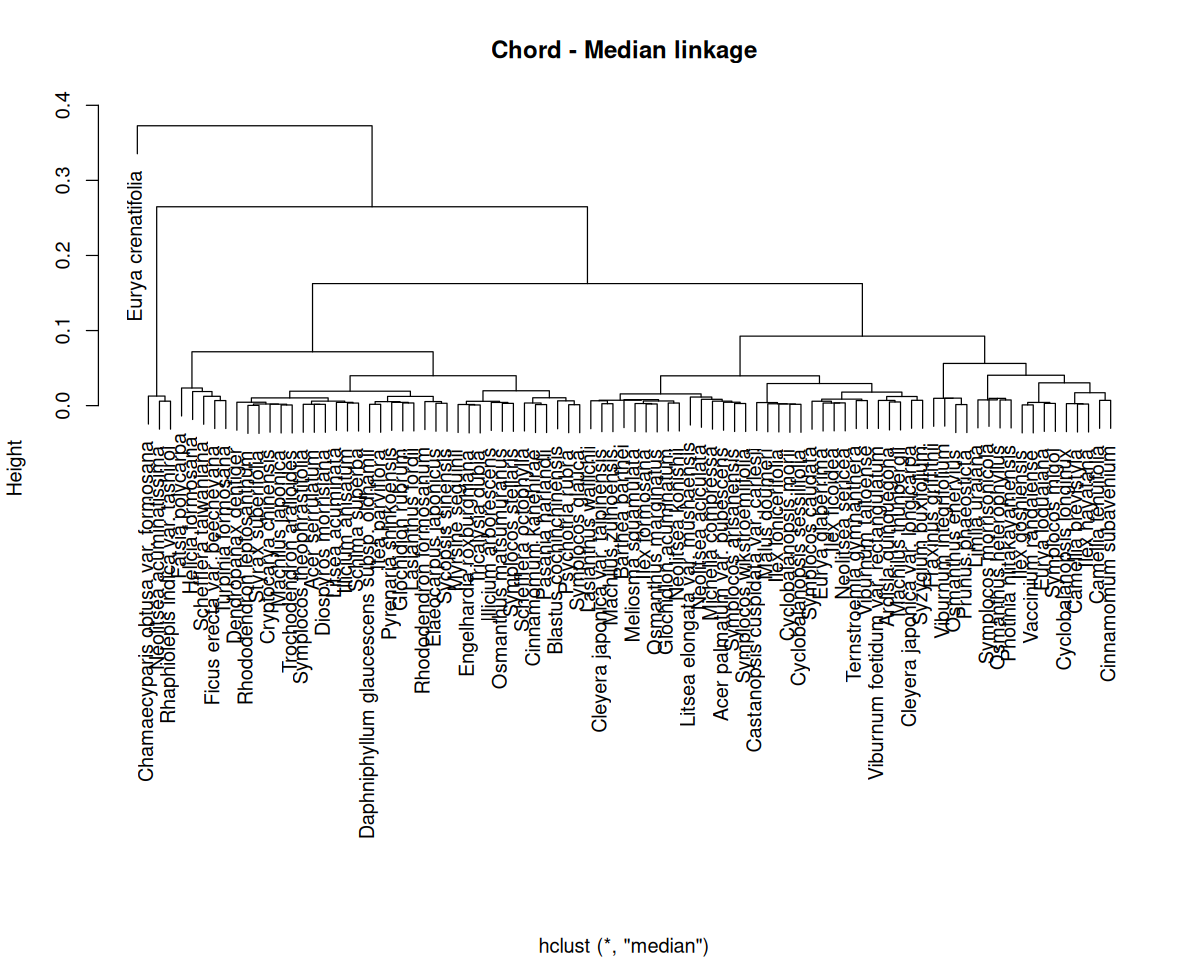

In [15]:
# Compute and plot median linkage agglomerative clustering
spe.ch.median <- hclust(distance_mat, method = "median")

# Set plot size in Jupyter Notebook (10 x 8 inches)
options(repr.plot.width = 10, repr.plot.height = 8)

# Plot the dendrogram using default options
plot(spe.ch.median, main = "Chord - Median linkage", xlab="")

Cophenetic distance

In [16]:
# Compute the cophenetic distance matrix from the dendrogram obtained with median linkage clustering
spe.ch.median.coph <- cophenetic(spe.ch.median)

# Compute the cophenetic correlation for median linkage
cor(distance_mat, spe.ch.median.coph)

[1] 0.7537758

Shepard diagram

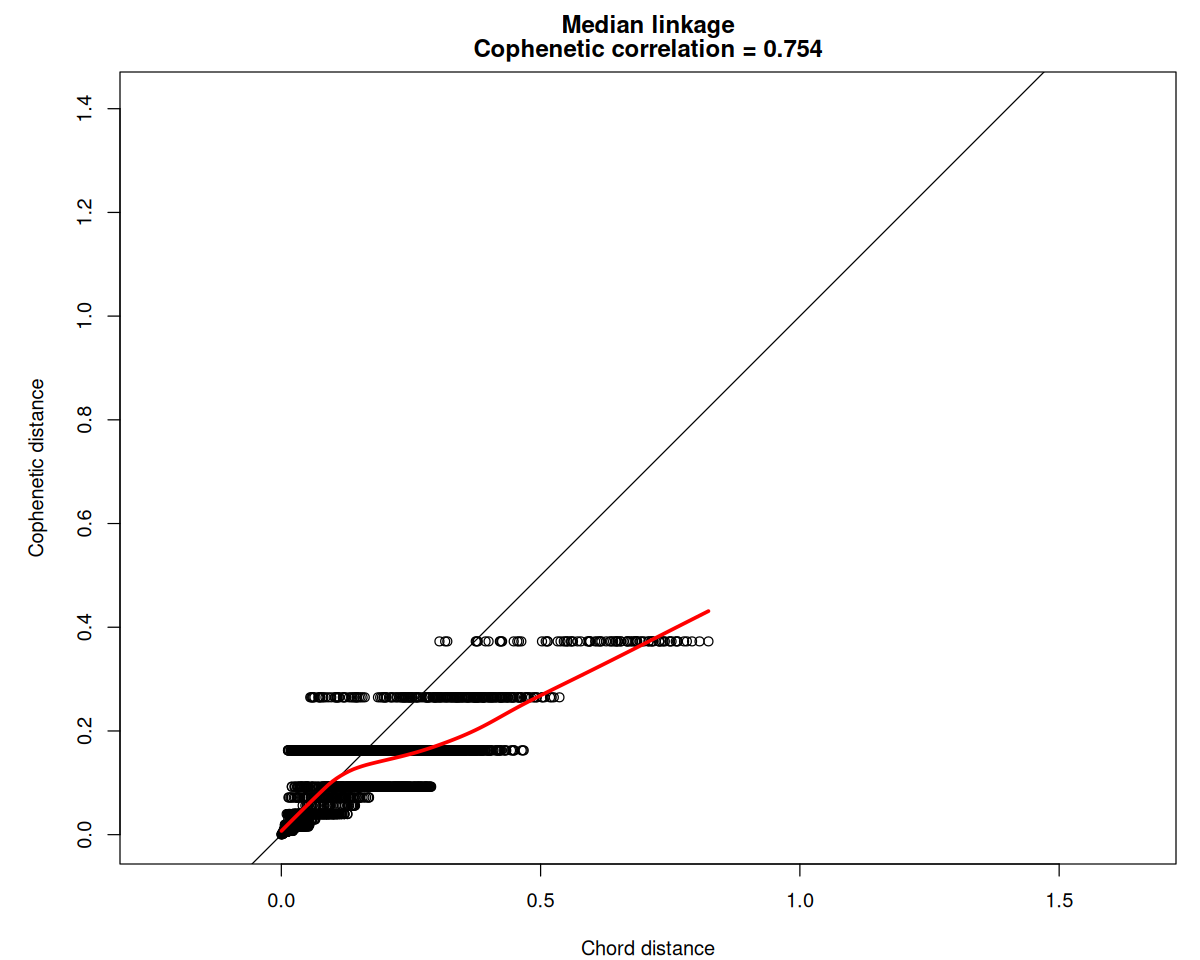

In [17]:
# Set plot size in Jupyter Notebook (10 x 8 inches)
options(repr.plot.width = 10, repr.plot.height = 8)

# Shepard diagram ---------------------------------------------------------
par(mfrow=c(1,1), mar=c(4,5,3,1))

plot(distance_mat, spe.ch.median.coph, #initial chord distance against cophenetic distance from median linkage clustering
  xlab = "Chord distance",
  ylab = "Cophenetic distance",
  asp = 1, xlim = c(0, sqrt(2)),
  ylim = c(0, sqrt(2)),
  main = c("Median linkage", paste("Cophenetic correlation =", round(cor(distance_mat, spe.ch.median.coph), 3))))
abline(0, 1)  # Add a 1:1 reference line (ideal match between distances)
lines(lowess(distance_mat, spe.ch.median.coph), col = "red", lwd=3) # Add a LOWESS (locally weighted scatterplot smoothing) curve to visualize the trend

Optimal number of cluster

In [18]:
Nb.median <- NbClust(
  traits_numeric,                # Input Spe matrix 
  diss = distance_mat,      #  Chord distance matrix for spe
  distance = NULL,    # Distance metric is NULL because we provide 'diss' directly
  min.nc = 2,         # Minimum number of clusters to test (start at 2)
  max.nc = 16,        # Maximum number of clusters to test (up to 16)
  method = "median",  # Clustering linkage method: median linkage here
  index = "ch"        # Evaluation criterion: Calinski-Harabasz index
)

Nb.median  # Displays the output from NbClust, including the suggested "optimal" number of clusters (best.nc) (here 10 clusters are suggested). 


$All.index
       2        3        4        5        6        7        8        9 
  0.1891   0.3026   3.0456   2.2994  10.7936   8.8890   7.5273   6.6328 
      10       11       12       13       14       15       16 
  5.8305   5.1811   4.6552 394.8625 386.3302 357.7280 908.7273 

$Best.nc
Number_clusters     Value_Index 
        16.0000        908.7273 

$Best.partition
             Acer palmatum var. pubescens 
                                        1 
                          Acer serrulatum 
                                        2 
                      Ardisia quinquegona 
                                        3 
                          Barthea barthei 
                                        1 
                  Blastus cochinchinensis 
                                        4 
                      Camellia brevistyla 
                                        5 
                      Camellia tenuifolia 
                                        5 
      Castanopsis cuspidata var. carlesii 
                                        6 
      Chamaecyparis obtusa var. formosana 
                                        7 
                     Cinnamomum kanehirae 
                                        4 
                    Cinnamomum subavenium 
                                        5 
         Cleyera japonica var. longicarpa 
                                        3 
        Cleyera japonica var. taipinensis 
                                        1 
                    Cryptocarya chinensis 
                                        2 
                 Cyclobalanopsis longinux 
                                        5 
                    Cyclobalanopsis morii 
                                        6 
             Cyclobalanopsis sessilifolia 
                                        6 
Daphniphyllum glaucescens subsp. oldhamii 
                                        8 
                     Dendropanax dentiger 
                                        2 
                     Diospyros morrisiana 
                                        2 
                    Elaeocarpus japonicus 
                                        8 
                 Engelhardia roxburghiana 
                                        9 
                       Eurya crenatifolia 
                                       10 
                         Eurya glaberrima 
                                        3 
                          Eurya loquaiana 
                                       11 
                         Fatsia polycarpa 
                                       12 
             Ficus erecta var. beecheyana 
                                       13 
                      Fraxinus griffithii 
                                       14 
                    Glochidion acuminatum 
                                        1 
                        Glochidion rubrum 
                                        8 
                        Helicia formosana 
                                       15 
                            Ilex ficoidea 
                                        3 
                           Ilex formosana 
                                        1 
                          Ilex goshiensis 
                                       11 
                            Ilex hayatana 
                                        5 
                       Ilex lonicerifolia 
                                        6 
                        Illicium anisatum 
                                        2 
                     Illicium arborescens 
                                        9 
                          Itea parviflora 
                                        8 
                        Lasianthus fordii 
                                        8 
                     Lasianthus wallichii 
                                        1 
                           Limlia uraiana 
                                       16 
          

Plot of optimal number of cluster

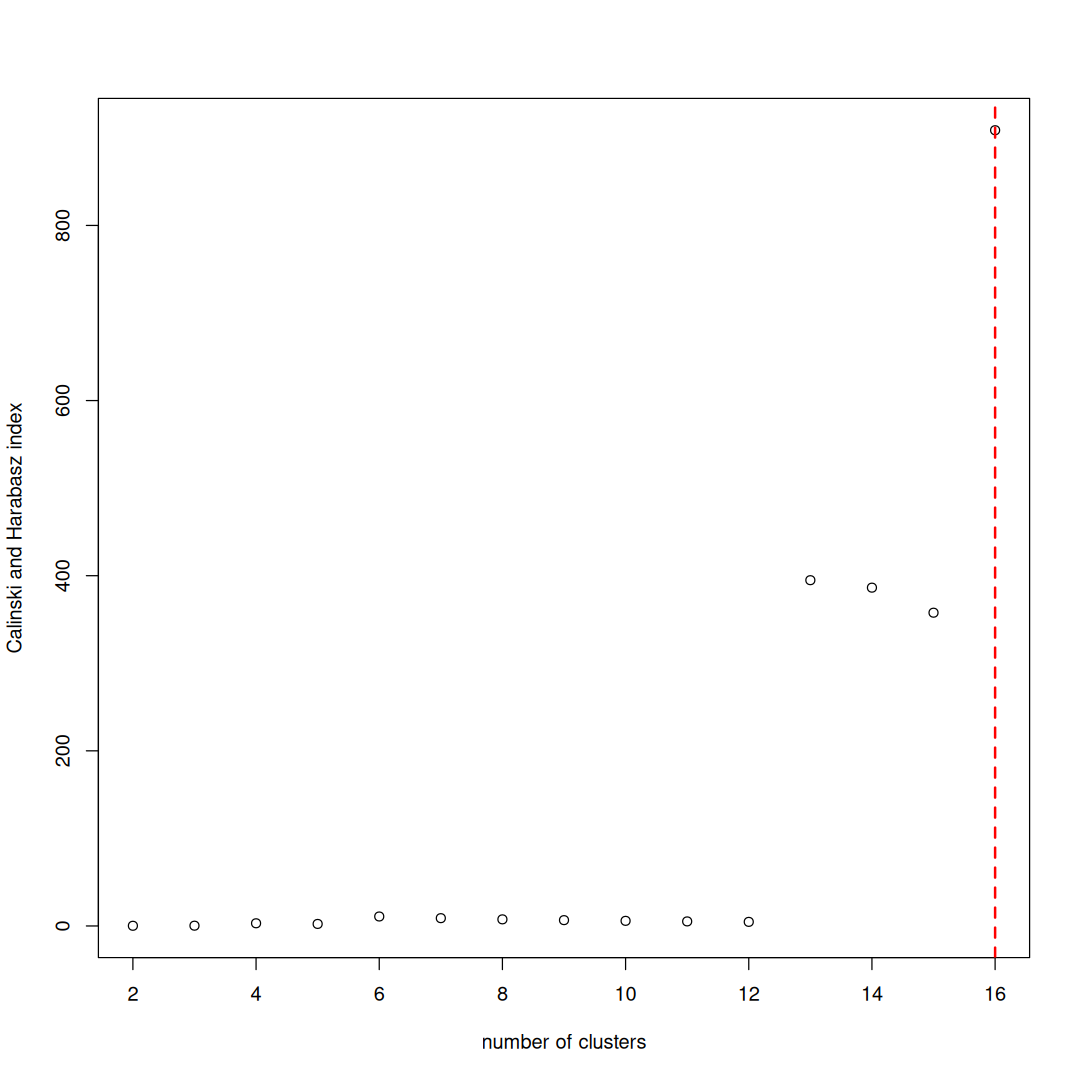

In [19]:
# Set plot size in Jupyter Notebook (9 x 9 inches)
options(repr.plot.width = 9, repr.plot.height = 9)
# Plot Index values (y) vs. number of clusters (x from 2 to 16)

plot(2:16,                                    # x : Range of cluster numbers to test (min to max)
     Nb.median$All.index,                     # Index values (y) for each number of clusters
     xlab = "number of clusters",             # Label for x-axis
     ylab = "Calinski and Harabasz index")    # Label for y-axis

abline(v = Nb.median$Best.nc[1],              # Add a vertical dashed line at optimal number of clusters
       col = "red",                           # Color of the line
       lty = 2,                               # Line type 2 = dashed
       lwd = 2)                               # Line width thicker for visibility


## Average linkage

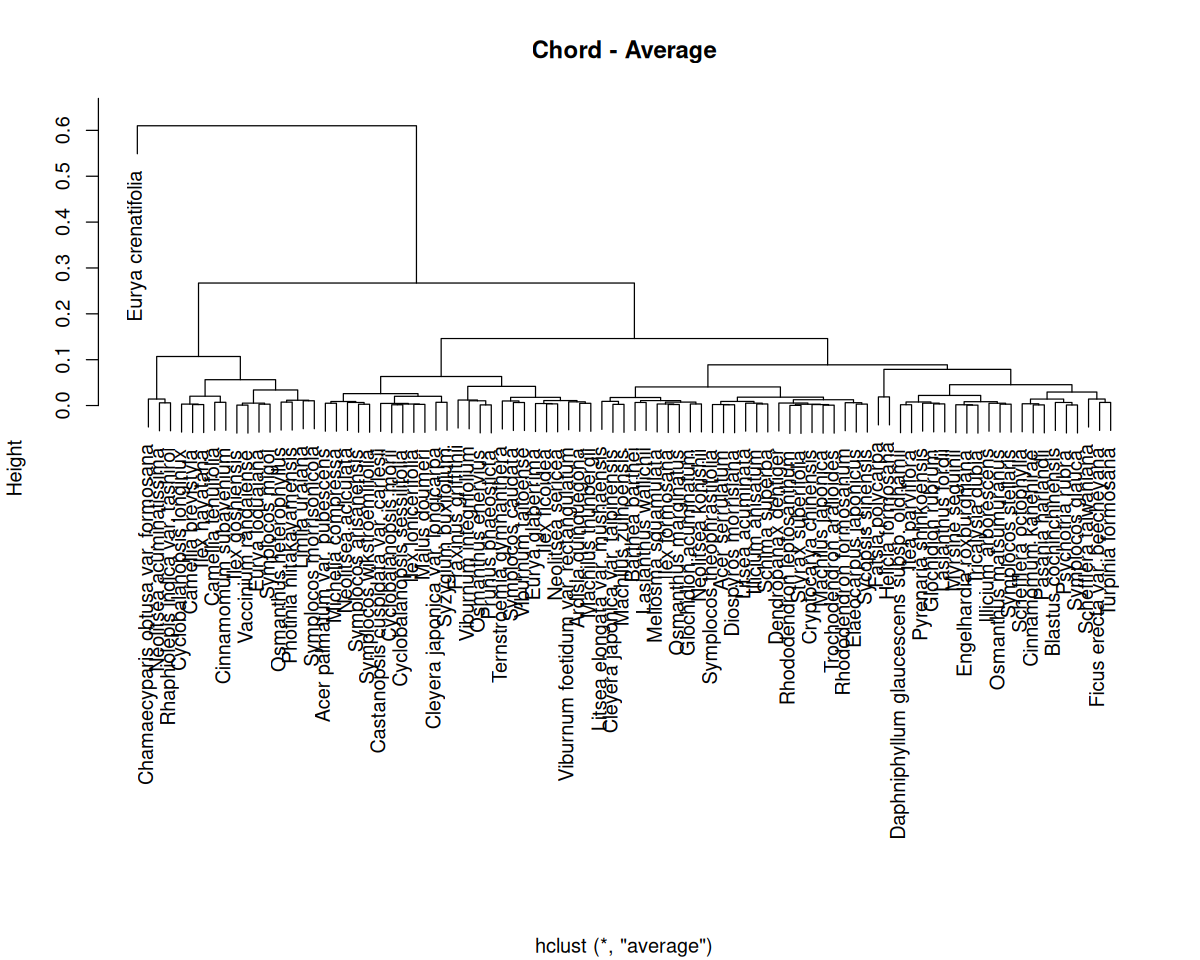

In [24]:
# Compute and plot UPGMA agglomerative clustering
spe.ch.UPGMA <- hclust(distance_mat, method = "average")

# Set plot size in Jupyter Notebook (10 x 8 inches)
options(repr.plot.width = 10, repr.plot.height = 8)

# Plot the dendrogram using default options
plot(spe.ch.UPGMA, main = "Chord - Average", xlab="")

Cophenetic distance

In [21]:
# Compute the cophenetic distance matrix from the dendrogram obtained with UPGMA linkage clustering
spe.ch.UPGMA.coph <- cophenetic(spe.ch.UPGMA)

# Compute the cophenetic correlation for complete linkage
cor(distance_mat, spe.ch.UPGMA.coph)

[1] 0.8527718

Shephard distance

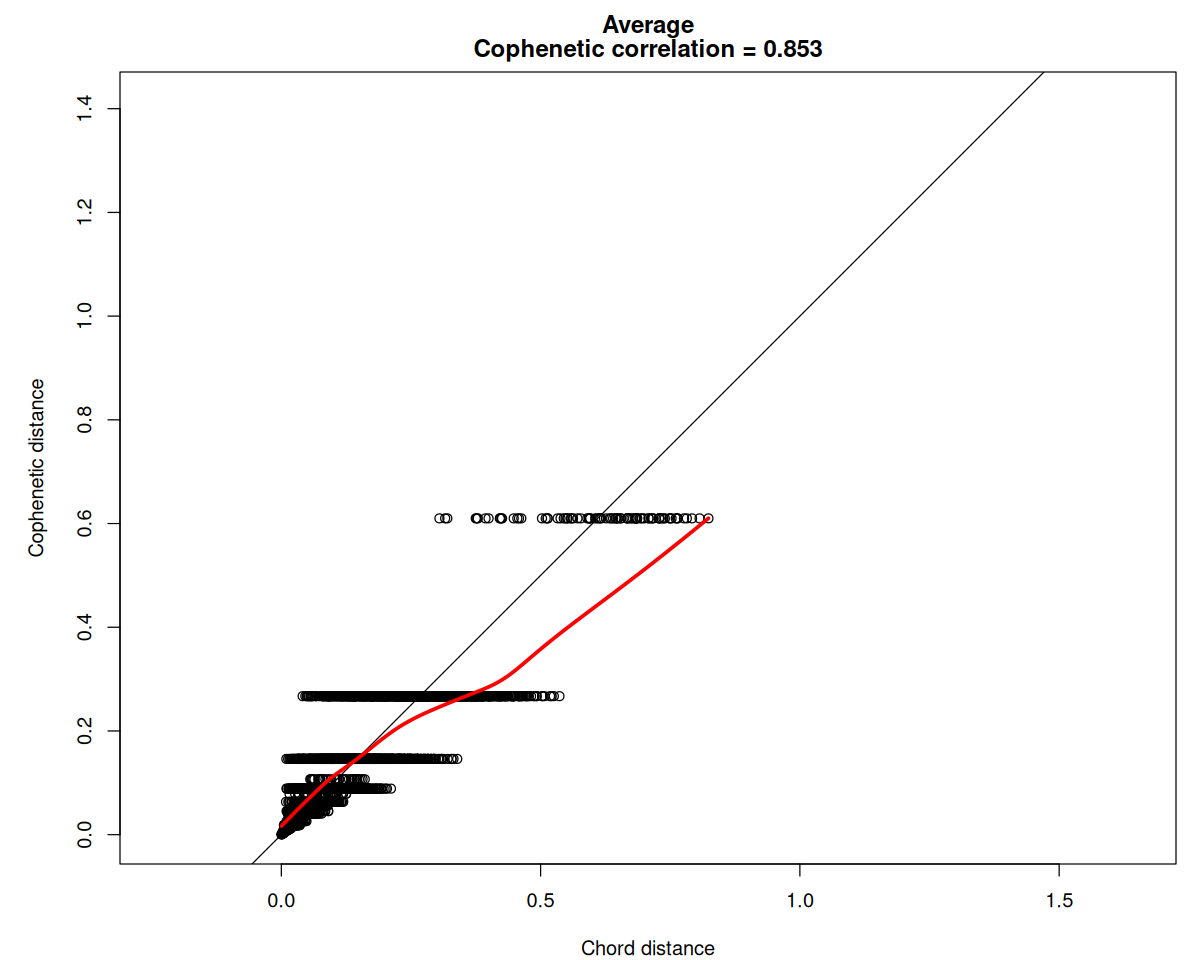

In [23]:
# Set plot size in Jupyter Notebook (10 x 8 inches)
options(repr.plot.width = 10, repr.plot.height = 8)

# Shepard diagram ---------------------------------------------------------
par(mfrow=c(1,1), mar=c(4,5,3,1))

plot(distance_mat, spe.ch.UPGMA.coph, #initial chord distance against cophenetic distance from single linkage clustering
  xlab = "Chord distance",
  ylab = "Cophenetic distance",
  asp = 1, xlim = c(0, sqrt(2)),
  ylim = c(0, sqrt(2)),
  main = c("Average", paste("Cophenetic correlation =", round(cor(distance_mat, spe.ch.UPGMA.coph), 3))))
abline(0, 1)  # Add a 1:1 reference line (ideal match between distances)
lines(lowess(distance_mat, spe.ch.UPGMA.coph), col = "red", lwd=3) # Add a LOWESS (locally weighted scatterplot smoothing) curve to visualize the trend

Optimal number of cluster

## CLUSTERRRRRRRRRRRRR !!!!!!!!!!!

In [25]:
Nb.UPGMA <- NbClust(
  traits_numeric,     # Input Spe matrix 
  diss = distance_mat,# Chord distance matrix for spe
  distance = NULL,    # Distance metric is NULL because we provide 'diss' directly
  min.nc = 2,         # Minimum number of clusters to test (start at 2)
  max.nc = 16,        # Maximum number of clusters to test (up to 16)
  method = "average", # Clustering linkage method: centroid linkage here
  index = "ch"        # Evaluation criterion: Calinski-Harabasz index
)

Nb.UPGMA  # Displays the output from NbClust, including the suggested "optimal" number of clusters (best.nc) (here 10 clusters are suggested). 

$All.index
      2       3       4       5       6       7       8       9      10      11 
 0.1891  1.2685  2.3073  1.7107  2.9109 29.7449 25.2204 21.7963 19.7911 17.5874 
     12      13      14      15      16 
15.8310 14.3253 13.2244 12.1184 11.1904 

$Best.nc
Number_clusters     Value_Index 
         7.0000         29.7449 

$Best.partition
             Acer palmatum var. pubescens 
                                        1 
                          Acer serrulatum 
                                        2 
                      Ardisia quinquegona 
                                        1 
                          Barthea barthei 
                                        2 
                  Blastus cochinchinensis 
                                        3 
                      Camellia brevistyla 
                                        4 
                      Camellia tenuifolia 
                                        4 
      Castanopsis cuspidata var. carlesii 
                                        1 
      Chamaecyparis obtusa var. formosana 
                                        5 
                     Cinnamomum kanehirae 
                                        3 
                    Cinnamomum subavenium 
                                        4 
         Cleyera japonica var. longicarpa 
                                        1 
        Cleyera japonica var. taipinensis 
                                        2 
                    Cryptocarya chinensis 
                                        2 
                 Cyclobalanopsis longinux 
                                        4 
                    Cyclobalanopsis morii 
                                        1 
             Cyclobalanopsis sessilifolia 
                                        1 
Daphniphyllum glaucescens subsp. oldhamii 
                                        3 
                     Dendropanax dentiger 
                                        2 
                     Diospyros morrisiana 
                                        2 
                    Elaeocarpus japonicus 
                                        2 
                 Engelhardia roxburghiana 
                                        3 
                       Eurya crenatifolia 
                                        6 
                         Eurya glaberrima 
                                        1 
                          Eurya loquaiana 
                                        4 
                         Fatsia polycarpa 
                                        7 
             Ficus erecta var. beecheyana 
                                        3 
                      Fraxinus griffithii 
                                        1 
                    Glochidion acuminatum 
                                        2 
                        Glochidion rubrum 
                                        3 
                        Helicia formosana 
                                        7 
                            Ilex ficoidea 
                                        1 
                           Ilex formosana 
                                        2 
                          Ilex goshiensis 
                                        4 
                            Ilex hayatana 
                                        4 
                       Ilex lonicerifolia 
                                        1 
                        Illicium anisatum 
                                        2 
                     Illicium arborescens 
                                        3 
                          Itea parviflora 
                                        3 
                        Lasianthus fordii 
                                        3 
                     Lasianthus wallichii 
                                        2 
                           Limlia uraiana 
                                        4 
                         Litsea acuminat

Plot of optimal number of cluster

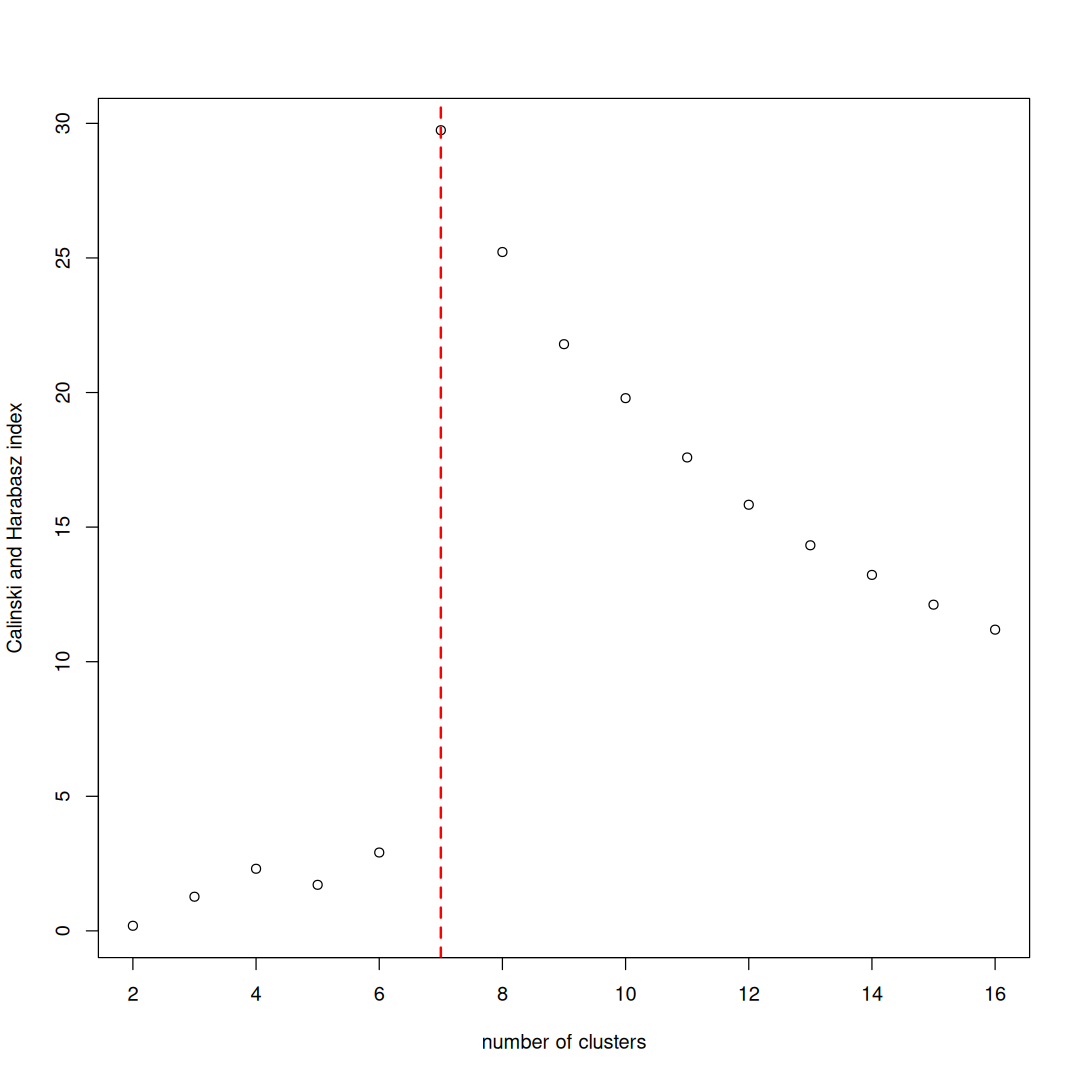

In [26]:
# Set plot size in Jupyter Notebook (9 x 9 inches)
options(repr.plot.width = 9, repr.plot.height = 9)
# Plot Index values (y) vs. number of clusters (x from 2 to 16)

plot(2:16,                                    # x : Range of cluster numbers to test (min to max)
     Nb.UPGMA$All.index,                      # Index values (y) for each number of clusters
     xlab = "number of clusters",             # Label for x-axis
     ylab = "Calinski and Harabasz index")    # Label for y-axis

abline(v = Nb.UPGMA$Best.nc[1],               # Add a vertical dashed line at optimal number of clusters
       col = "red",                           # Color of the line
       lty = 2,                               # Line type 2 = dashed
       lwd = 2)                               # Line width thicker for visibility

### PCoA

In [ ]:
# Plot the ordination scores of sites from the first two PCoA axes as text labels
ordiplot(scores(distance_mat.pcoa, choices = c(1, 2)),
         type = "text",
         main = "PCoA with species weighted averages")

# Calculate weighted average scores of species based on site coordinates in PCoA space
spe.wa <- wascores(distance_mat.pcoa$points[, 1:2], distance_mat)

# Add species names at their weighted average positions on the plot in red, smaller font
text(spe.wa, rownames(spe.wa), cex = 0.7, col = "red")

# Perform envfit to fit environmental variables onto the PCoA ordination
spe.b.pcoa.env <- envfit(distance_mat.pcoa, env)

# Display the results of the envfit, including significance and vector directions
spe.b.pcoa.env

# Set plot size in Jupyter Notebook (12 x 12 inches)
options(repr.plot.width = 12, repr.plot.height = 12)
# Plot only significant environmental variables (p-value < 0.05) onto the ordination plot
# Using color code 3 (typically green)
plot(spe.b.pcoa.env, p.max = 0.05, col = 3)